In [1]:
!rm -rf /content/Split_data

In [2]:
!unzip -q '/content/drive/MyDrive/INTERNSHIP_VIHARA/PROJECT2/Split_data.zip' -d /content/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
training_data_path =  '/content/Split_data/Train/Group_3'
validation_data_path = '/content/Split_data/Validation/Group_3'

In [5]:
os.listdir(training_data_path)

['Taquito', 'Taco', 'apple_pie']

In [6]:
os.listdir(validation_data_path)

['Taquito', 'Taco', 'apple_pie']

In [7]:
os.listdir(training_data_path+'/Taco')

['Taco-Train (523).jpeg',
 'Taco-Train (1010).jpeg',
 'Taco-Train (1126).jpeg',
 'Taco-Train (1037).jpeg',
 'Taco-Train (1009).jpeg',
 'Taco-Train (173).jpeg',
 'Taco-Train (695).jpeg',
 'Taco-Train (1398).jpeg',
 'Taco-Train (521).jpeg',
 'Taco-Train (1127).jpeg',
 'Taco-Train (894).jpeg',
 'Taco-Train (899).jpeg',
 'Taco-Train (892).jpeg',
 'Taco-Train (49).jpeg',
 'Taco-Train (107).jpeg',
 'Taco-Train (986).jpeg',
 'Taco-Train (1364).jpeg',
 'Taco-Train (771).jpeg',
 'Taco-Train (243).jpeg',
 'Taco-Train (877).jpeg',
 'Taco-Train (871).jpeg',
 'Taco-Train (385).jpeg',
 'Taco-Train (1348).jpeg',
 'Taco-Train (1190).jpeg',
 'Taco-Train (939).jpeg',
 'Taco-Train (1060).jpeg',
 'Taco-Train (866).jpeg',
 'Taco-Train (14).jpeg',
 'Taco-Train (752).jpeg',
 'Taco-Train (1076).jpeg',
 'Taco-Train (357).jpeg',
 'Taco-Train (971).jpeg',
 'Taco-Train (1219).jpeg',
 'Taco-Train (741).jpeg',
 'Taco-Train (191).jpeg',
 'Taco-Train (276).jpeg',
 'Taco-Train (769).jpeg',
 'Taco-Train (196).jpeg',
 '

In [10]:
os.listdir(training_data_path+'/apple_pie')

['283209.jpg',
 '1184568.jpg',
 '1510930.jpg',
 '1840575.jpg',
 '2819833.jpg',
 '498726.jpg',
 '3869215.jpg',
 '812047.jpg',
 '3023096.jpg',
 '3440507.jpg',
 '3392444.jpg',
 '1185654.jpg',
 '1420999.jpg',
 '3636185.jpg',
 '116705.jpg',
 '1240585.jpg',
 '2202694.jpg',
 '913161.jpg',
 '1944962.jpg',
 '3065929.jpg',
 '2126901.jpg',
 '2458159.jpg',
 '886518.jpg',
 '2223847.jpg',
 '3192774.jpg',
 '3175105.jpg',
 '1629072.jpg',
 '1670009.jpg',
 '2854105.jpg',
 '3546563.jpg',
 '300660.jpg',
 '594677.jpg',
 '807000.jpg',
 '1547651.jpg',
 '715180.jpg',
 '656340.jpg',
 '3915887.jpg',
 '2084963.jpg',
 '2328227.jpg',
 '1103795.jpg',
 '495046.jpg',
 '3619289.jpg',
 '3547012.jpg',
 '2878249.jpg',
 '963140.jpg',
 '2206034.jpg',
 '1376013.jpg',
 '362792.jpg',
 '2109273.jpg',
 '3240840.jpg',
 '2702725.jpg',
 '653135.jpg',
 '793078.jpg',
 '960233.jpg',
 '250066.jpg',
 '3478976.jpg',
 '3068872.jpg',
 '1700578.jpg',
 '2635983.jpg',
 '2383378.jpg',
 '1147371.jpg',
 '2517642.jpg',
 '1112300.jpg',
 '2840005.

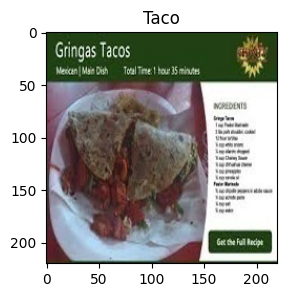

In [11]:
plt.figure(figsize=(5,3))
plt.title('Taco')
Baked_potato = plt.imread(training_data_path + '/Taco/Taco-Train (1010).jpeg')
plt.imshow(Baked_potato)
plt.show()

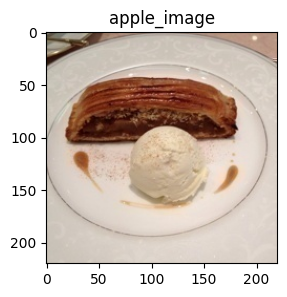

In [12]:
plt.figure(figsize=(5,3))
plt.title('apple_image')
Donut = plt.imread(training_data_path + '/apple_pie/1147371.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
group2_path = os.path.join(training_data_path)
labels = sorted([name for name in os.listdir(group2_path)
                 if os.path.isdir(os.path.join(group2_path, name))])
print("Group_1 Classes:", labels)


Group_1 Classes: ['Taco', 'Taquito', 'apple_pie']


In [15]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [16]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid


In [17]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [19]:
num_classes = 3

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(256,256,3)),
                     BatchNormalization(),
                     MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
                      Dropout(0.3),
    Dense(num_classes, activation='softmax')])

In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,875 (64.36 MB)

 Trainable params: 16,871,427 (64.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [21]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step - accuracy: 0.4231 - loss: 2.8308 - val_accuracy: 0.3250 - val_loss: 1.5700
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.5130 - loss: 1.1265 - val_accuracy: 0.3000 - val_loss: 1.3847
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.6639 - loss: 0.7414 - val_accuracy: 0.3417 - val_loss: 1.8694
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 445ms/step - accuracy: 0.6847 - loss: 0.7194 - val_accuracy: 0.4250 - val_loss: 2.0643
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.7799 - loss: 0.5619 - val_accuracy: 0.4500 - val_loss: 2.1324
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - accuracy: 0.7479 - loss: 0.5695 - val_accuracy: 0.4667 - val_loss: 2.3310
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.7448 - loss: 0.5464 - val_accuracy: 0.4417 - val_loss: 2.6156
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - accuracy: 0.7829 - loss: 0.5532 - val_accuracy: 0

**test_model**

In [22]:
import cv2

In [23]:
labels

['Taco', 'Taquito', 'apple_pie']

In [24]:
train_input_data.class_indices

{'Taco': 0, 'Taquito': 1, 'apple_pie': 2}

In [25]:
def fun(path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # Predict using the model
    pred = model.predict(input_image)

    # Mapping only for Group_1 (train_input_data created from Group_1 folder)
    mapping = train_input_data.class_indices  # Automatically has only 3 classes
    inv_map = {v: k for k, v in mapping.items()}

    # Get predicted class index and label
    predicted_index = np.argmax(pred)
    predicted_label = inv_map[predicted_index]

    # Print for debugging
    print("Group_1 class mapping:", mapping)
    print("Model raw output:", pred)
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}")

    # Display image with prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Group_1 class mapping: {'Taco': 0, 'Taquito': 1, 'apple_pie': 2}
Model raw output: [[4.4616777e-03 9.9552876e-01 9.6310532e-06]]
Predicted class index: 1
Predicted label: Taquito


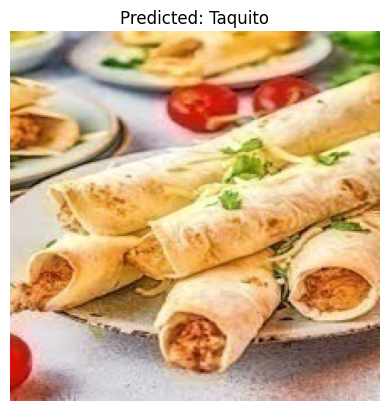

In [27]:
fun('/content/Split_data/Train/Group_3/Taquito/Taquito-Train (1095).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Group_1 class mapping: {'Taco': 0, 'Taquito': 1, 'apple_pie': 2}
Model raw output: [[5.9082423e-04 1.9808185e-04 9.9921107e-01]]
Predicted class index: 2
Predicted label: apple_pie


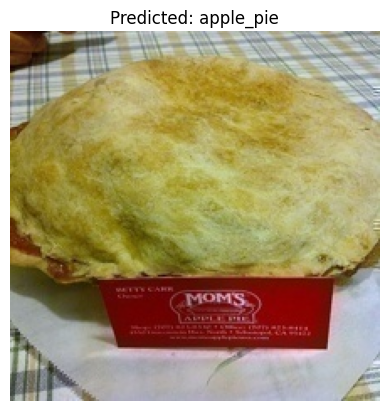

In [28]:
fun('/content/Split_data/Train/Group_3/apple_pie/1184568.jpg')

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [33]:
test_data_path = '/content/Split_data/Test/Group_3'

In [35]:
labels = ['Taco', 'Taquito', 'apple_pie']


In [36]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [37]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [38]:
from sklearn.metrics import classification_report, accuracy_score

In [39]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [40]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))

Classification Report:

              precision    recall  f1-score   support

        Taco       0.39      0.47      0.43        40
     Taquito       0.41      0.40      0.41        40
   apple_pie       0.81      0.65      0.72        40

    accuracy                           0.51       120
   macro avg       0.54      0.51      0.52       120
weighted avg       0.54      0.51      0.52       120



In [41]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.5083


In [42]:
model.save('/content/train_group3.h5')
print("Model saved successfully at /content/custom_food_model.h5")

Model saved successfully at /content/custom_food_model.h5


In [43]:
from tensorflow.keras.models import load_model
model = load_model('/content/train_group3.h5')
